In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [129]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [130]:
print(df_train.shape, df_test.shape)
df_train.head()

(891, 12) (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [131]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [132]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [133]:
df_train.drop(['Cabin','Ticket'], axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)
df_train.dropna(subset=['Age'], inplace=True)
df_test.dropna(subset=['Age'], inplace=True)

In [134]:
df_train["Survived"].value_counts().to_frame()


,count
Survived,
0,424
1,290


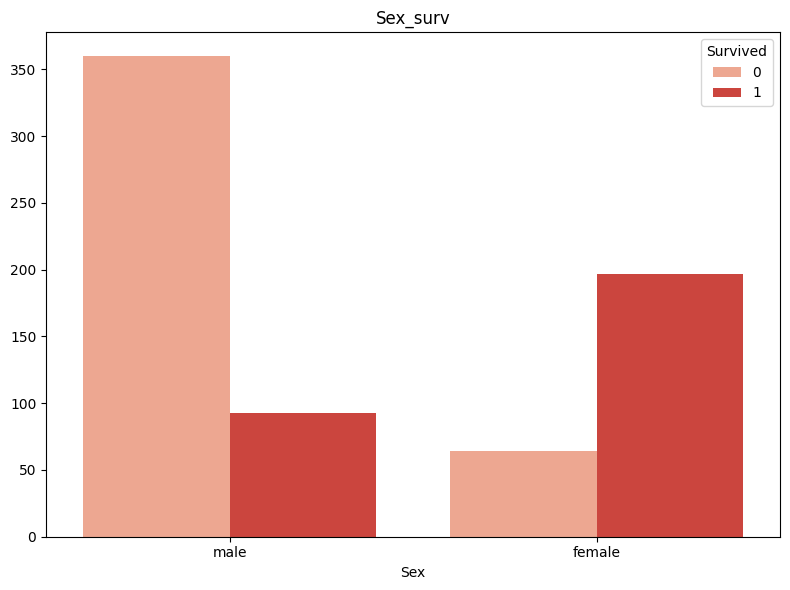

In [135]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x = "Sex", hue="Survived", palette="Reds");
plt.title("Sex_surv")
plt.xlabel('Sex')
plt.ylabel('')
plt.tight_layout()
plt.show()




In [136]:
from sklearn.preprocessing import OneHotEncoder

df_train['Title'] = df_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

df_train[['Sex', 'Embarked', 'Title']] = df_train[['Sex', 'Embarked', 'Title']].fillna('Missing')

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df_train[['Sex', 'Embarked', 'Title']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Sex', 'Embarked', 'Title']))

df_train_encoded = pd.concat([
    df_train.drop(columns=['Sex', 'Embarked', 'Title', 'Name', ]),
    encoded_df
], axis=1)

print(df_train_encoded.head())

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  \
0          1.0       0.0     3.0  22.0    1.0    0.0   7.2500         0.0   
1          2.0       1.0     1.0  38.0    1.0    0.0  71.2833         1.0   
2          3.0       1.0     3.0  26.0    0.0    0.0   7.9250         1.0   
3          4.0       1.0     1.0  35.0    1.0    0.0  53.1000         1.0   
4          5.0       0.0     3.0  35.0    0.0    0.0   8.0500         0.0   

   Sex_male  Embarked_C  ...  Title_Major  Title_Master  Title_Miss  \
0       1.0         0.0  ...          0.0           0.0         0.0   
1       0.0         1.0  ...          0.0           0.0         0.0   
2       0.0         0.0  ...          0.0           0.0         1.0   
3       0.0         0.0  ...          0.0           0.0         0.0   
4       1.0         0.0  ...          0.0           0.0         0.0   

   Title_Mlle  Title_Mme  Title_Mr  Title_Mrs  Title_Ms  Title_Rev  Title_Sir  
0         0.0        0.0      

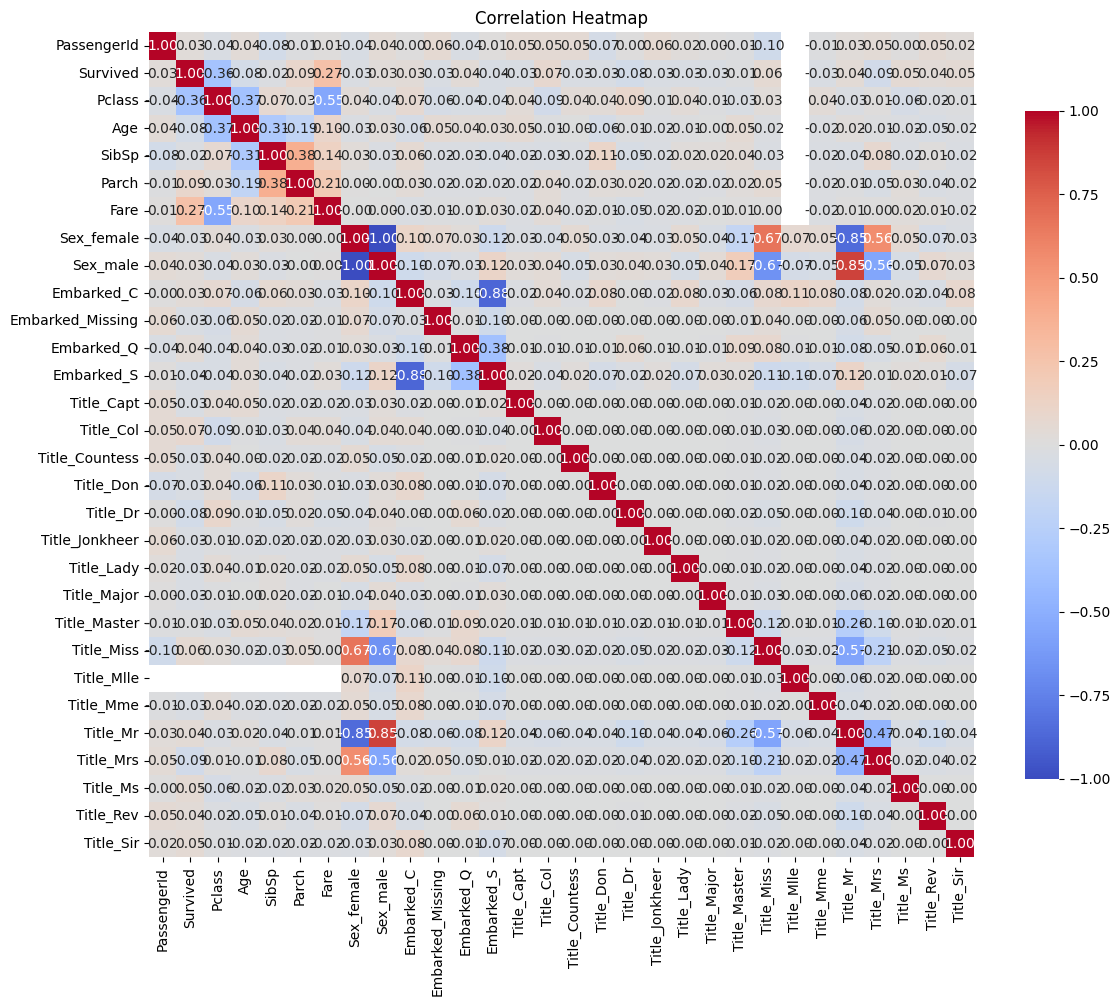

In [137]:
corr = df_train_encoded.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')    
plt.tight_layout()
plt.show()

In [138]:
df_train = df_train.drop(columns=['Name', 'PassengerId', 'Embarked', 'Title'])
df_test = df_test.drop(columns=['Name', 'PassengerId', 'Embarked','Ticket'])

In [139]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875
...,...,...,...,...,...,...
409,3,female,3.0,1,1,13.7750
411,1,female,37.0,1,0,90.0000
412,3,female,28.0,0,0,7.7750
414,1,female,39.0,0,0,108.9000


In [140]:
df_test_encoded = pd.get_dummies(df_test, columns=['Sex'])
df_test_encoded['Sex_female'] = df_test_encoded['Sex_female'].astype(int)
df_test_encoded['Sex_male'] = df_test_encoded['Sex_male'].astype(int)
df_test_encoded.head()


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,34.5,0,0,7.8292,0,1
1,3,47.0,1,0,7.0000,1,0
2,2,62.0,0,0,9.6875,0,1
3,3,27.0,0,0,8.6625,0,1
4,3,22.0,1,1,12.2875,1,0


In [141]:
df_train_encoded = pd.get_dummies(df_train, columns = ['Sex'])
df_train_encoded['Sex_female'] = df_train_encoded['Sex_female'].astype(int)
df_train_encoded['Sex_male'] = df_train_encoded['Sex_male'].astype(int)
df_train_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1


In [142]:
X = df_train_encoded.drop(columns=['Survived'])
y = df_train_encoded['Survived']


In [143]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42
)
rf_model.fit(X, y)

# Прогноз на train
y_train_pred = rf_model.predict(X)

# Метрики
acc = accuracy_score(y, y_train_pred)
prec = precision_score(y, y_train_pred)
rec = recall_score(y, y_train_pred)
f1 = f1_score(y, y_train_pred)

print(f"Train accuracy: {acc:.4f}")
print(f"Train precision: {prec:.4f}")
print(f"Train recall: {rec:.4f}")
print(f"Train F1-score: {f1:.4f}")



Train accuracy: 0.8557
Train precision: 0.8880
Train recall: 0.7379
Train F1-score: 0.8060


In [ ]:
pred = y_pred = rf_model.predict(df_test_encoded)

In [145]:
df_test['Survived'] = pred
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,34.5,0,0,7.8292,0
1,3,female,47.0,1,0,7.0000,0
2,2,male,62.0,0,0,9.6875,0
3,3,male,27.0,0,0,8.6625,0
4,3,female,22.0,1,1,12.2875,1
